# Analysis of  StarTracker Pointing - Repeatability 
## Join Nigths 15th and 17th Nights

Here, I present the analysis of the pointing repeatability of


Full 3.5 degree ofsset test description at: https://sitcomtn-063.lsst.io/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Datasets

Each row it's a image taken. The baseline are the mean values over three images. The residuals are the difference from the mean.

In [65]:
today = '2023-03-09'
df1 = pd.read_csv('tmp/repeatability_%s.csv'%today, index_col=0)
df1['night'] = today
df1

,Res ra,Res dec,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,-0.046677,-0.136924,157.015871,-12.615696,60.246587,59.615712,6,2023-03-09
1,0.132427,-0.083425,157.015871,-12.615696,60.274138,59.568745,6,2023-03-09
2,0.305739,0.096971,157.015871,-12.615696,60.301547,59.521833,6,2023-03-09
3,-0.391489,0.123378,157.015871,-12.615696,60.329150,59.474609,6,2023-03-09
4,-0.320366,-0.442535,156.665353,-9.133542,58.266904,53.917251,6,2023-03-09
...,...,...,...,...,...,...,...,...
498,-0.508849,-0.205268,204.455062,9.552425,36.750177,47.766671,10,2023-03-09
499,-0.635683,0.043030,204.455062,9.552425,36.773911,47.731738,10,2023-03-09
500,0.117023,0.077408,202.250675,12.310982,36.042709,43.402615,10,2023-03-09
501,0.005393,-0.105032,202.250675,12.310982,36.064693,43.367125,10,2023-03-09


In [161]:
today = '2023-03-17'
df2 = pd.read_csv('tmp/repeatability_%s.csv'%today, index_col=0)
df2['night'] = today
df2['Snakes']+=10 # to make different from night 1
df2

,Res ra,Res dec,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,0.109158,0.037272,232.373881,-40.072940,75.080722,135.302565,11,2023-03-17
1,0.082695,0.004132,232.373881,-40.072940,75.103539,135.370403,11,2023-03-17
2,-0.191852,-0.041403,232.373881,-40.072940,75.126174,135.438035,11,2023-03-17
3,0.406317,0.273562,228.148945,-38.733365,78.510010,140.754688,11,2023-03-17
4,-0.816183,-0.808765,228.148945,-38.733365,78.530302,140.860674,11,2023-03-17
...,...,...,...,...,...,...,...,...
538,0.133347,-0.001110,213.382705,12.318721,33.935096,313.420077,27,2023-03-17
539,-0.028634,0.026898,213.382705,12.318721,33.911818,313.386604,27,2023-03-17
540,-0.116348,0.287571,208.591153,20.031672,24.966858,314.944123,27,2023-03-17
541,0.172341,-0.256296,208.591153,20.031672,24.944353,314.914885,27,2023-03-17


In [162]:
df = pd.concat([df1,df2])
df

,Res ra,Res dec,Base Ra,Base Dec,Base Az,Base Alt,Snakes,night
0,-0.046677,-0.136924,157.015871,-12.615696,60.246587,59.615712,6,2023-03-09
1,0.132427,-0.083425,157.015871,-12.615696,60.274138,59.568745,6,2023-03-09
2,0.305739,0.096971,157.015871,-12.615696,60.301547,59.521833,6,2023-03-09
3,-0.391489,0.123378,157.015871,-12.615696,60.329150,59.474609,6,2023-03-09
4,-0.320366,-0.442535,156.665353,-9.133542,58.266904,53.917251,6,2023-03-09
...,...,...,...,...,...,...,...,...
538,0.133347,-0.001110,213.382705,12.318721,33.935096,313.420077,27,2023-03-17
539,-0.028634,0.026898,213.382705,12.318721,33.911818,313.386604,27,2023-03-17
540,-0.116348,0.287571,208.591153,20.031672,24.966858,314.944123,27,2023-03-17
541,0.172341,-0.256296,208.591153,20.031672,24.944353,314.914885,27,2023-03-17


## Residual Histograms

Here I plot the astrometric residual distribution.  

In [225]:
data = df.to_numpy()
res_ra = data[:,0].astype(float)
res_dec = data[:,1].astype(float)

base_az = data[:,5].astype(float)
base_alt = data[:,4].astype(float)

snakes = data[:,-2].astype(int)

night1 = data[:,-1]=='2023-03-09'
night2 = data[:,-1]=='2023-03-17'

In [226]:
def gaussian(x,mean,std):
    arg = (x-mean)/std
    return np.exp(-arg**2)/np.sqrt(2*np.pi*std**2)

def plot_gaussian(x,mean,std,N=1,**kwargs):
    dx = np.diff(mybins)[0]
    plt.plot(x, N * gaussian(x, mean, std)*dx, **kwargs)
    

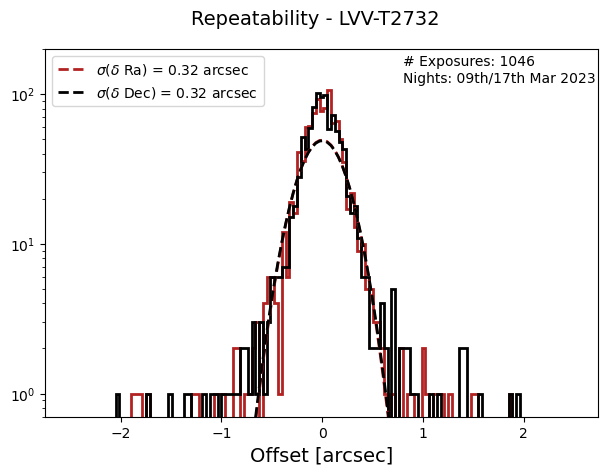

In [227]:
jra = np.std(res_ra)
jdec = np.std(res_dec)

Npoints = res_ra.size
mybins = np.arange(-2.5, 2.51, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.8, 120, '# Exposures: %i \nNights: 09th/17th Mar 2023 '%Npoints)
plt.yscale('log')
plt.ylim(0.7,200)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram.png',dpi=100)

In [228]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.std(res_ra[ix]),np.std(res_dec[ix])])
stds = np.array(stds)

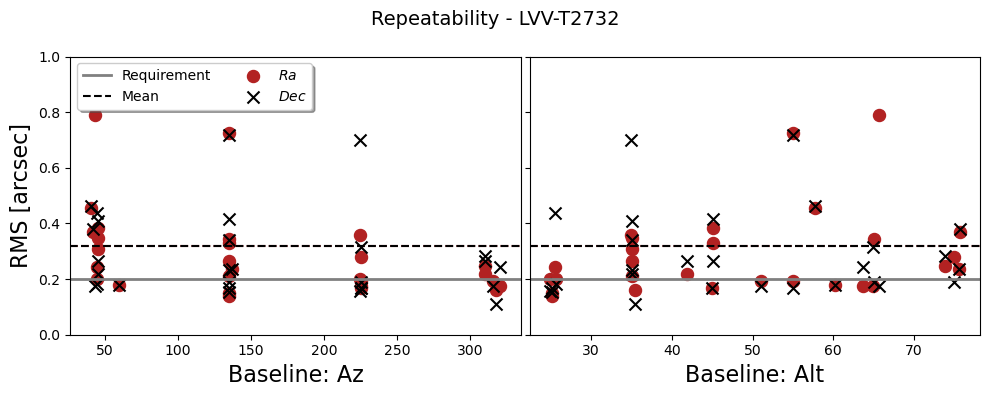

In [229]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')


ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt.png',dpi=100)

## Repeat the plots for each night

The two nights dataset have equivalents results. Here I show them separately for the record.

### 9th March

In [242]:
today = '2023-03-09'
data = df1.to_numpy()
res_ra = data[:,0].astype(float)
res_dec = data[:,1].astype(float)

base_az = data[:,5].astype(float)
base_alt = data[:,4].astype(float)

snakes = data[:,-2].astype(int)

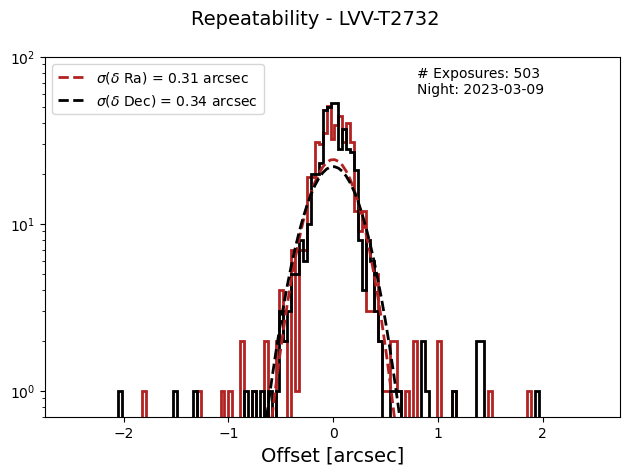

In [243]:
jra = np.std(res_ra)
jdec = np.std(res_dec)

Npoints = res_ra.size
mybins = np.arange(-2.5, 2.51, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.8, 120/2., '# Exposures: %i \nNight: %s '%(Npoints, today))
plt.yscale('log')
plt.ylim(0.7,200/2.)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram_%s.png'%today,dpi=100)

In [244]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.std(res_ra[ix]),np.std(res_dec[ix])])
stds = np.array(stds)

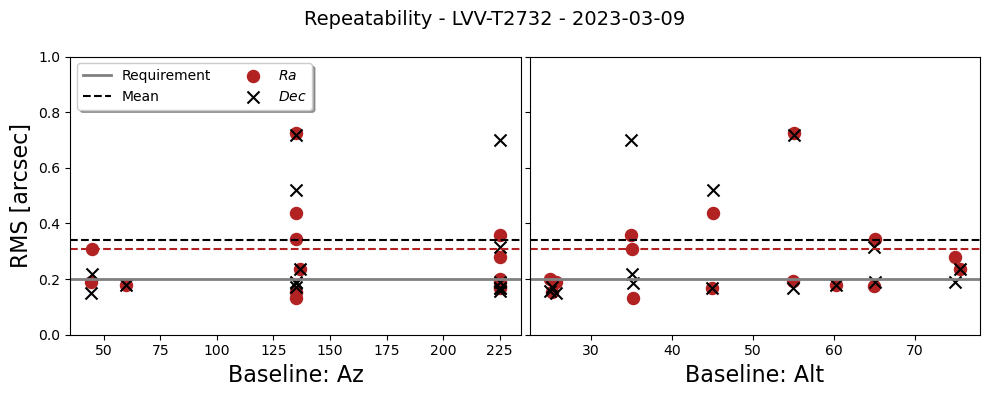

In [245]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')


ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732 - %s'%today,fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt_%s.png'%today,dpi=100)

### 17th March

In [250]:
today = '2023-03-17'
data = df2.to_numpy()
res_ra = data[:,0].astype(float)
res_dec = data[:,1].astype(float)

base_az = data[:,5].astype(float)
base_alt = data[:,4].astype(float)

snakes = data[:,-2].astype(int)

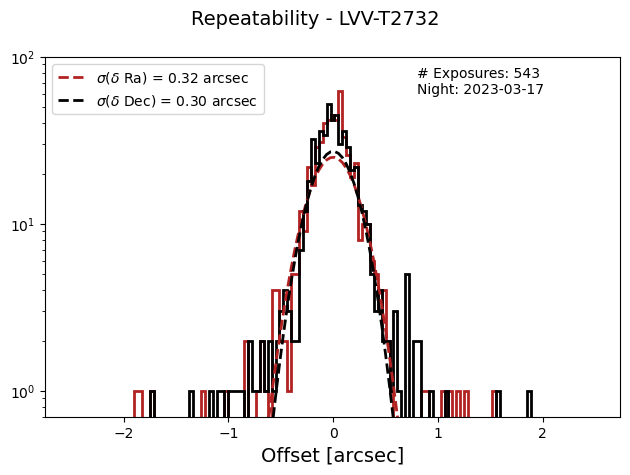

In [251]:
jra = np.std(res_ra)
jdec = np.std(res_dec)

Npoints = res_ra.size
mybins = np.arange(-2.5, 2.51, 0.15/4.)

_ = plt.hist(res_ra, bins=mybins, color='firebrick', histtype='step', lw=2, )
_ = plt.hist(res_dec, bins=mybins, color='k', histtype='step', lw=2)
plot_gaussian(mybins,0,jra, N=Npoints,label='$\sigma(\delta$ Ra) = %.2f arcsec'%jra, color='firebrick', ls='--', lw=2)
plot_gaussian(mybins,0,jdec, N=Npoints,label='$\sigma(\delta$ Dec) = %.2f arcsec'%jdec, color='k', ls='--', lw=2)
plt.text(0.8, 120/2., '# Exposures: %i \nNight: %s '%(Npoints, today))
plt.yscale('log')
plt.ylim(0.7,200/2.)
plt.legend(loc=2)
plt.xlabel('Offset [arcsec]', fontsize=14)
plt.suptitle('Repeatability - LVV-T2732',fontsize=14)
plt.tight_layout()
plt.savefig('figures/radec_residual_histogram_%s.png'%today,dpi=100)

In [252]:
sunique, sids, counts = np.unique(snakes, return_index=True, return_counts=True)
keys = [np.where(snakes==gi)[0] for gi in sunique]

stds = []
for ix in keys:
    stds.append([np.std(res_ra[ix]),np.std(res_dec[ix])])
stds = np.array(stds)

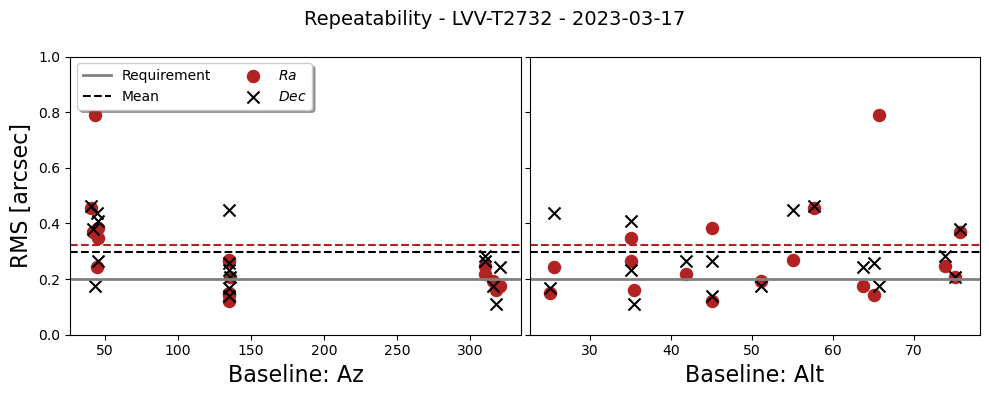

In [253]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey='all')


ax1.axhline(0.2, color='gray', lw=2, label='Requirement')
ax2.axhline(0.2, color='gray', lw=2, label='Requirement')

ax2.axhline(jra, c='firebrick', ls='--')
ax2.axhline(jdec, c='k', ls='--')

ax1.axhline(jra, c='firebrick', ls='--')
ax1.axhline(jdec, c='k', ls='--',label='Mean')

ax1.scatter(base_az[sids], stds[:,0], c='firebrick', s=75, label=r'$Ra$')
ax2.scatter(base_alt[sids], stds[:,0], c='firebrick', s=75)

ax1.scatter(base_az[sids], stds[:,1], c='k', marker='x', s=75, label=r'$Dec$')
ax2.scatter(base_alt[sids], stds[:,1], c='k', marker='x', s=75)

ax1.set_ylim(0.,1.0)
ax1.legend(loc=2, ncol=2, fancybox=True, shadow=True)
# ax2.legend(loc=1)

ax1.set_ylabel('RMS [arcsec]',fontsize=16)
ax1.set_xlabel('Baseline: Az',fontsize=16)
ax2.set_xlabel('Baseline: Alt',fontsize=16)
fig.suptitle('Repeatability - LVV-T2732 - %s'%today,fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.02)
plt.savefig('figures/scatter_radec_azalt_%s.png'%today,dpi=100)